In [2]:
# Importando todas as bibliotecas necessárias:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usando função mágica para exibição dos gráficos:

%matplotlib inline

In [3]:
# Importando as FEATURES e o TARGET:
df = pd.read_csv('training.csv', header=None)

# Definindo o valor de amostras:
M = len(df[0].to_numpy())

# Definindo as entradas:
x0 = np.ones((M, 1))
x  = (df[0].to_numpy()).reshape(M, 1)

# Definindo a saída:
y = (df[1].to_numpy()).reshape(M, 1)

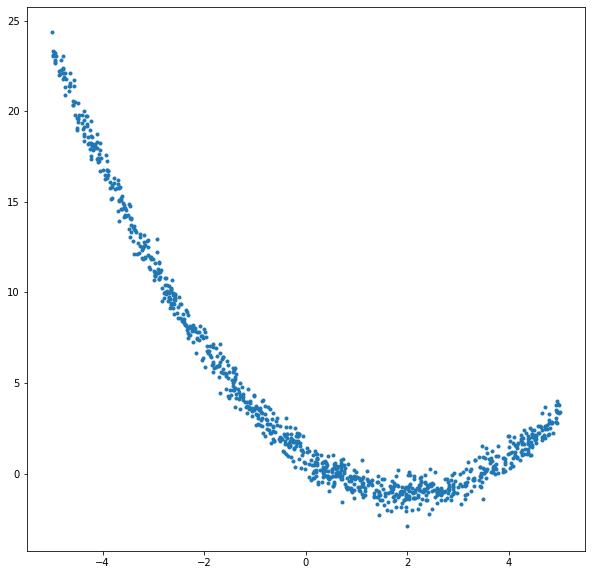

In [4]:
# Plotando a figura:

fig = plt.figure(figsize=(10,10))

plt.plot(x, y, '.')

plt.show()

In [5]:
# Concatenando os valores de x:
X = np.c_[x0, x, x**2]

# Aplicando a formula fechada: 
a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
y_hat = a_opt[0, 0] + a_opt[1, 0] * x + a_opt[2, 0] * x**2
j_opt = (1/M)*np.sum(np.power((y - y_hat), 2) )

In [6]:
# Imprimindo os valores encontrados:
print('O valor de a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O valor de a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))
print('O valor de a2 ótimo encontrado pela formula fechada é: {}'.format(a_opt[2, 0]))

O valor de a0 ótimo encontrado pela formula fechada é: 0.9924663768766355
O valor de a1 ótimo encontrado pela formula fechada é: -2.0085758534142473
O valor de a2 ótimo encontrado pela formula fechada é: 0.49872709942636173


In [18]:
# Definindo o passo de aprendizagem: 
alpha = 0.008

# Criando o vetor de ARMAZENAMENTO dos pesos ótimos:
a = np.zeros((3, 1))

# Definindo os valores INICIAIS para os pesos:
a[0, 0] = -10
a[1, 0] = -10
a[2, 0] = -10

# Criando a matriz de pesos históricos: 
a_hist = np.zeros((3, M+1))

# Criando a matriz de ERROS:
jgd = np.zeros(M + 1)

# Definindo o valor INICIAL do erro:
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [19]:
# Definindo o valor INICIAL da iteração:
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((3, M))

In [24]:
while iteration < M:
    
    gradients = -(2.0/M)*X.T.dot(y - X.dot(a))
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    grad_hist[2, iteration] = gradients[2, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0,0]
    a_hist[1, iteration+1] = a[1,0]
    a_hist[2, iteration+1] = a[2,0]    
    
    jgd[iteration+1] = (1.0/M)*sum(np.power( (y - X.dot(a)) , 2))
    
    iteration += 1   

In [25]:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))
print('O valor de a2 ótimo encontrado pelo gradiente é: {}'.format(a[2, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: 0.9866024898068335
O valor de a1 ótimo encontrado pelo gradiente é: -2.0085873049195833
O valor de a2 ótimo encontrado pelo gradiente é: 0.4991232879969605


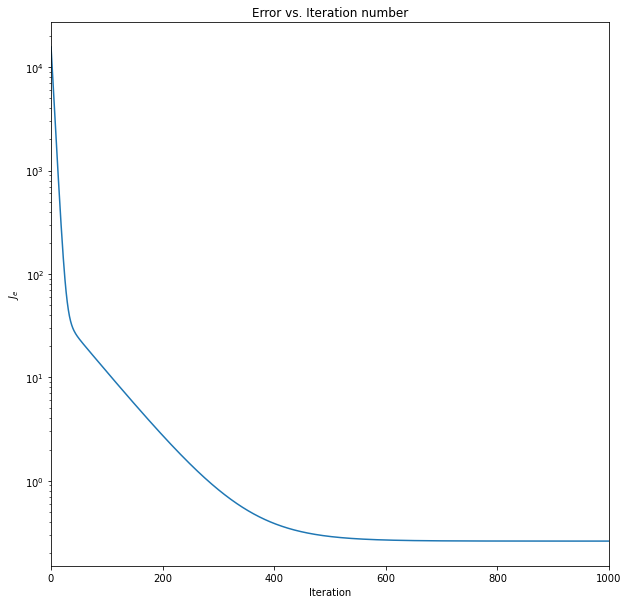

In [22]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

Text(0.5, 1.0, 'Função Original x Hipótese')

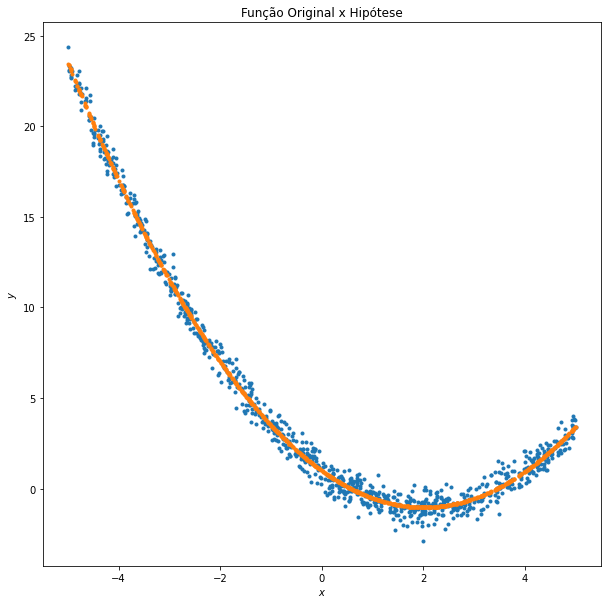

In [23]:
fig = plt.figure(figsize=(10,10))
plt.plot(x, y, '.')          # Função ORIGINAL
plt.plot(x, y_hat, '.')      # Função HIPÓTESE
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Função Original x Hipótese')